<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [20]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime, date, time, timezone, timedelta 

import os
import re

from functools import reduce
from collections import defaultdict 
import prophet as pr

import sklearn.datasets as skd 
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'match_result_test.csv',
 '1_order_payments_dataset.csv',
 'bz_data_analyis.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'mock_sales_data.csv',
 'ecommerce-data.csv',
 'sales_vs_discount.csv',
 '1_orders_dataset.csv',
 'groceries.csv',
 'mall_customers.csv',
 'scanner_data.csv',
 'online_retail.xlsx',
 'sales.csv',
 'test.csv',
 'online_retail_II.xlsx',
 'sales_data_with_stores.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 '1_customers_dataset.csv',
 'sample-sales-data.csv',
 'sample_data']

In [6]:
raw = skd.fetch_california_housing()
raw.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [10]:
x = pd.DataFrame(raw['data'], columns = [a.lower() for a in raw['feature_names']])
y = raw['target']
x.head()

,medinc,houseage,averooms,avebedrms,population,aveoccup,latitude,longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [16]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7, random_state = 42)

In [17]:
fit_rf = RandomForestRegressor()

In [18]:
fit_rf.fit(x_tr, y_tr)

RandomForestRegressor()

In [21]:
mean_squared_error(fit_rf.predict(x_te), y_te)

0.25481450223510344

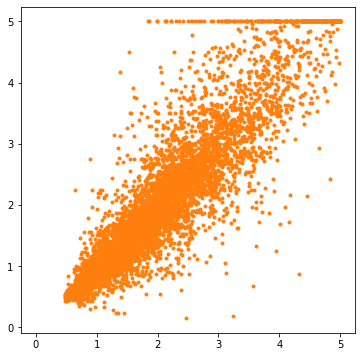

In [28]:
plt.figure(figsize = (6,6))
plt.plot([0,0],[5,5])
plt.plot(fit_rf.predict(x_te), y_te, '.')

# Iterators

In [29]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [31]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}